In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
data=pd.read_csv(r"C:\Users\sejal\OneDrive\Desktop\customer_segmentation_project\data\customer_segment_data.csv")

In [3]:
#small view of dataset
data.head(3)

,Customer_ID,Age,Gender,Occupation,Income_Bracket,Family_Size,Marital_Status,Education_Level,Region,Monthly_Revenue,...,Last_Interaction_Days,Number_of_Complaints,Payment_Method,Bill_Payment_Timeliness,Outstanding_Balance,Loyalty_Points,Campaign_Responses,Social_Media_Activity,Network_Complaints,Service_Downtime_Impact
0,CUST_00001,54,Female,Student,<$50K,2,Married,Bachelors,North,528.830083,...,305,0,UPI,Late by >5 Days,482.132987,997,6,High,2,Low
1,CUST_00002,22,Male,Student,$50K–$100K,3,Single,PhD,West,885.610365,...,297,8,Debit Card,On Time,364.522598,978,5,High,7,High
2,CUST_00003,41,Female,Professional,$50K–$100K,4,Divorced,PhD,West,449.301745,...,343,6,UPI,On Time,181.326469,587,4,Moderate,1,High


In [4]:
features=data[['Age','CLTV','Monthly_Revenue','Avg_Monthly_Data_Usage_GB','Feedback_Score']]



In [5]:
#scaling the data
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)
pd.DataFrame(scaled_features,columns=features.columns).head(3)



,Age,CLTV,Monthly_Revenue,Avg_Monthly_Data_Usage_GB,Feedback_Score
0,0.957645,0.562392,-0.001221,-0.073146,0.867239
1,-1.419014,-1.034283,1.329418,0.105776,-0.170956
2,-0.007873,-0.884947,-0.297828,1.545859,-0.517021


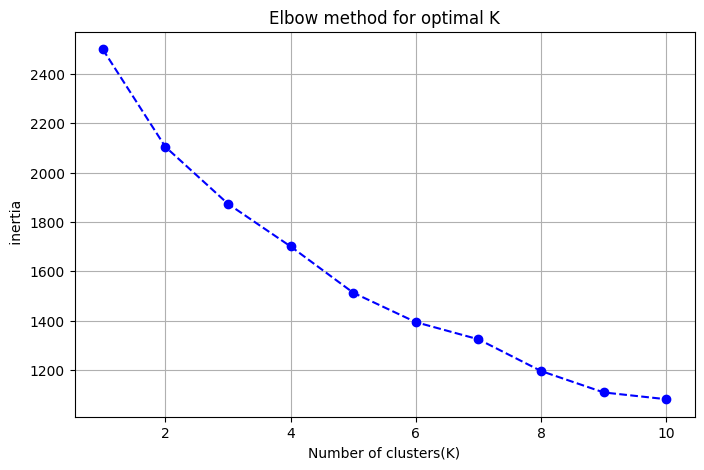

In [6]:
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)



   
plt.figure(figsize=(8,5))
plt.plot(k_range,inertia,marker='o',linestyle='--',color='b')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of clusters(K)')
plt.ylabel(" inertia")
plt.grid()
plt.show()

In [7]:
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
data['Segment']=kmeans.fit_predict(scaled_features)

segment_labels={0:'High=value',1:'Mid-value',2:'Low-value'}
data['Segment']=data['Segment'].map(segment_labels)
data[['Customer_ID','Segment']].head(3)

,Customer_ID,Segment
0,CUST_00001,High=value
1,CUST_00002,Mid-value
2,CUST_00003,Mid-value


In [8]:
#comparison of features
metrics=['Monthly_Revenue','CLTV','Churn_Status','Feedback_Score']
comparison=data.groupby('Segment')[metrics].value_counts()
comparison

Segment     Monthly_Revenue  CLTV          Churn_Status  Feedback_Score
High=value  52.975211        16518.603859  No            10                1
            78.254812        14314.224646  No            7                 1
            80.791369        15069.785724  No            5                 1
            81.510934        3162.631380   Yes           7                 1
            130.051628       9112.807683   No            8                 1
                                                                          ..
Mid-value   992.035247       17495.891559  No            5                 1
            992.564194       19017.456085  Yes           4                 1
            996.876818       5636.736680   No            3                 1
            999.234275       8431.624966   No            2                 1
            999.285749       10691.452500  No            1                 1
Name: count, Length: 500, dtype: int64

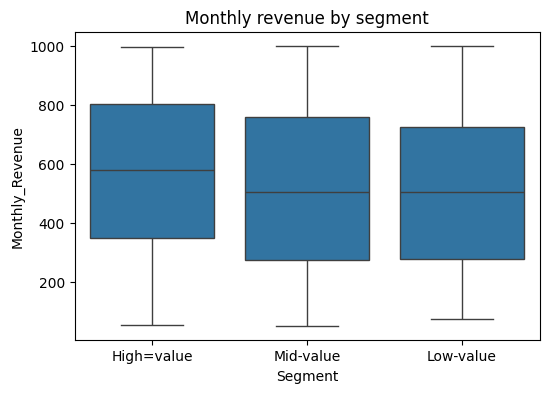

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='Segment',y='Monthly_Revenue')
plt.title('Monthly revenue by segment')
plt.show()

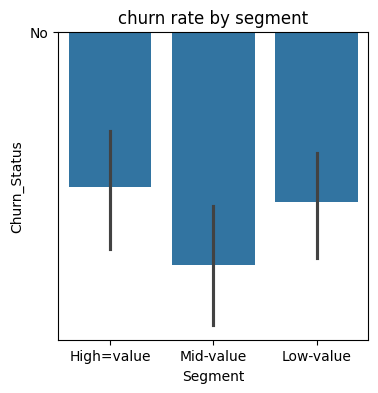

In [10]:
plt.figure(figsize=(4,4))
sns.barplot(data=data,x='Segment',y='Churn_Status')
plt.title('churn rate by segment')
plt.show()

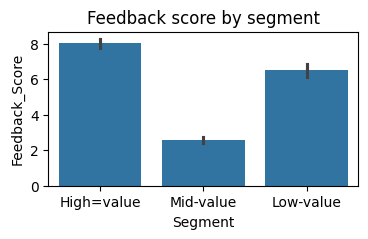

In [11]:
plt.figure(figsize=(4,2))
sns.barplot(data=data,x='Segment',y='Feedback_Score')
plt.title('Feedback score by segment')
plt.show()

In [13]:
data.to_csv(r"C:\Users\sejal\OneDrive\Desktop\customer_segmentation_project\data\segment_output.csv",index=False)